In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

In [2]:
data = pd.read_csv("Salary_dataset.csv")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Vetorizing datas for x and y axis

In [3]:
X = [x for x in data['YearsExperience']]
Y = [y for y in data['Salary']]


In [4]:
a11 = len(X)
a12 = sum(X)
b1 = sum(Y)
a21 = a12
a22 = sum([x**2 for x in X])
b2 = sum(X[i]*Y[i] for i in range(len(X)))

In [5]:
A = np.array ([
    [a11, a12],
    [a21, a22]
])
B = np.array([b1, b2])

sol = np.linalg.solve(A, B)
b0 = sol[0]
b1 = sol[1]
Y_pred = [b0+ b1*x for x in X]

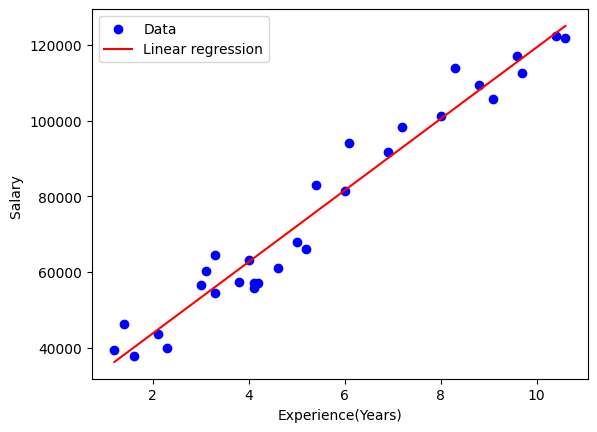

In [6]:
plt.scatter(X,Y, color='blue',label='Data')
plt.plot(X,Y_pred, color= 'red', label='Linear regression')
plt.xlabel('Experience(Years)')
plt.ylabel('Salary ')
plt.legend()
plt.grid(False)
plt.show()

### Split for train and test, and using K-validation with RMSE

In [7]:
X_train, x_test, Y_train, y_test = train_test_split(np.array(X),np.array(Y),random_state = 0, train_size = .75)
X_train = np.array(X_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)


In [8]:
reg_all = LinearRegression()    
reg_all.fit(X_train,Y_train)

y_pred = reg_all.predict(x_test)
print("R^2: {}".format(reg_all.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: R${:.2f}".format(rmse))

R^2: 0.9779208335417602
Root Mean Squared Error: R$4733.70


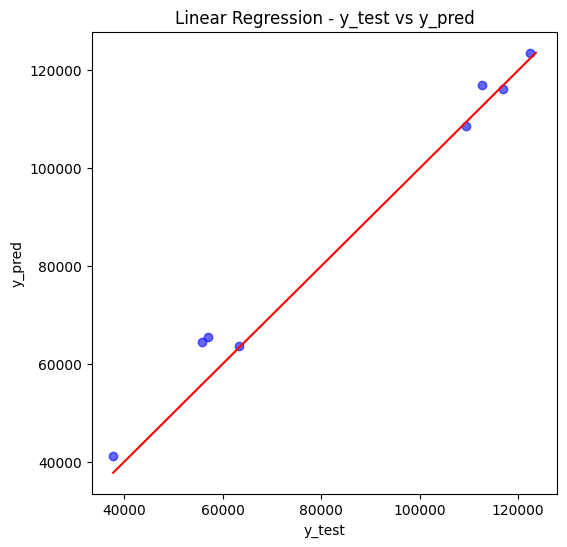

In [9]:
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')
plt.title('Linear Regression - y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()